In [1]:
!pip install qiskit qiskit[visualization] qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=03a9dce8826481e735428d17aba0ed5c3333398d282aed9b617b1c17a804cf53
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [4]:
from qiskit.quantum_info import Operator

In [7]:
# esta es la matriz X de Pauli
mat1 = np.array([[0,1],[1,0]])
op1 = Operator(mat1)
print(mat1)
print(op1)

[[0 1]
 [1 0]]
Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [10]:
# esta es la matriz Y de Pauli
mat2 = np.array([[0,-1j],[1j,0]])
op2 = Operator(mat2)
print(mat2)
print(op2)

[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
Operator([[ 0.+0.j, -0.-1.j],
          [ 0.+1.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [11]:
mat1t = np.conjugate(np.transpose(mat1))

In [13]:
np.matmul(mat1t,mat1)

array([[1, 0],
       [0, 1]])

In [15]:
op1t = Operator(mat1t)
op1t

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [16]:
op1t @ op1

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [17]:
op1t.compose(op1)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [18]:
op1 @ op2

Operator([[0.+1.j, 0.+0.j],
          [0.+0.j, 0.-1.j]],
         input_dims=(2,), output_dims=(2,))


In [20]:
op2.compose(op1)

Operator([[0.+1.j, 0.+0.j],
          [0.+0.j, 0.-1.j]],
         input_dims=(2,), output_dims=(2,))


In [21]:
op1t

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [22]:
op1.adjoint()

Operator([[0.-0.j, 1.-0.j],
          [1.-0.j, 0.-0.j]],
         input_dims=(2,), output_dims=(2,))


In [23]:
op2.adjoint()

Operator([[ 0.-0.j,  0.-1.j],
          [-0.+1.j,  0.-0.j]],
         input_dims=(2,), output_dims=(2,))


In [24]:
op2.adjoint() @ op2

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [25]:
Xmat = np.array([[0,1],[1,0]])


In [26]:
from scipy.linalg import expm

In [28]:
t = 0.25
Umat = expm(-1j * Xmat * t)
Umat

array([[0.96891242+0.j        , 0.        -0.24740396j],
       [0.        -0.24740396j, 0.96891242+0.j        ]])

In [29]:
U = Operator(Umat)
U

Operator([[0.96891242+0.j        , 0.        -0.24740396j],
          [0.        -0.24740396j, 0.96891242+0.j        ]],
         input_dims=(2,), output_dims=(2,))


In [30]:
from qiskit.circuit.library import UnitaryGate

In [32]:
U_gate =UnitaryGate(U, label='Ug')
U_gate

Instruction(name='unitary', num_qubits=1, num_clbits=0, params=[array([[0.96891242+0.j        , 0.        -0.24740396j],
       [0.        -0.24740396j, 0.96891242+0.j        ]])])

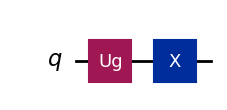

In [55]:
qc = QuantumCircuit(1)
qc.append(U_gate, [0])
qc.x(0)
qc.draw('mpl')

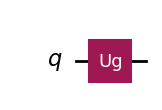

In [38]:
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
qc_transpiled.draw('mpl')

In [56]:
state = Statevector(qc)
state

Statevector([0.        -0.24740396j, 0.96891242+0.j        ],
            dims=(2,))


In [61]:
vec1 = np.matmul(Umat, np.array([1,0]))
vec2 = np.matmul(np.array([[0,1],[1,0]]), vec1)
print(vec2)

[0.        -0.24740396j 0.96891242+0.j        ]


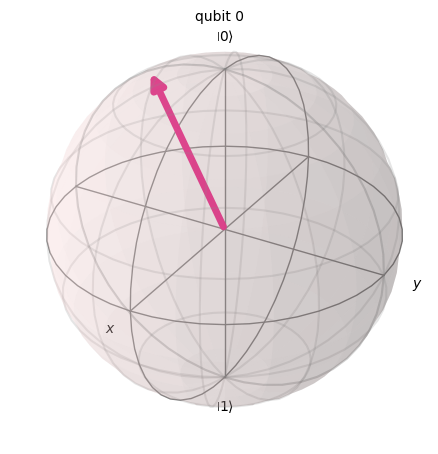

In [40]:
plot_bloch_multivector(state)

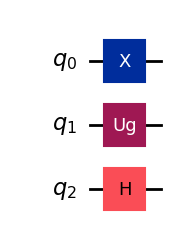

In [51]:
qc = QuantumCircuit(3)
qc.x(0)
qc.append(U_gate, [1])
qc.h(2)
qc.draw('mpl')

In [52]:
state = Statevector(qc)
state

Statevector([0.        +0.j        , 0.68512454+0.j        ,
             0.        +0.j        , 0.        -0.17494102j,
             0.        +0.j        , 0.68512454+0.j        ,
             0.        +0.j        , 0.        -0.17494102j],
            dims=(2, 2, 2))


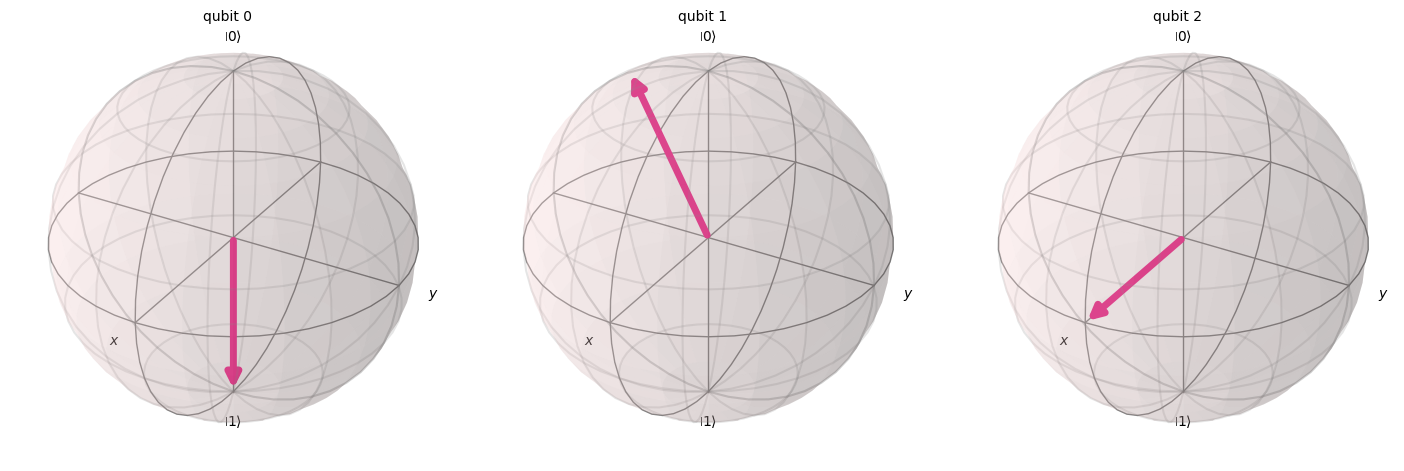

In [53]:
plot_bloch_multivector(state)